In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

df = pd.read_excel('C:/Users/sebac/OneDrive/Documentos/Cursos/0-DATASETS/bostonHousing1978.xlsx')

In [52]:
# Tamaño y forma del dataframe
df.shape  # Muestra la cantidad de filas y columnas en el dataframe.

(506, 4)

In [53]:
# Primeras filas del dataframe
df.head()  # Muestra las primeras 5 filas del dataframe para dar un vistazo inicial a los datos.

,RM,LSTAT,PTRATIO,target
0,6.575,4.98,15.3,24.0
1,6.421,9.14,17.8,21.6
2,7.185,4.03,17.8,34.7
3,6.998,2.94,18.7,33.4
4,7.147,5.33,18.7,36.2


In [54]:
# Ultimas filas del dataframe
df.tail()  # Muestra las últimas 5 filas, útil para ver si los datos tienen algún patrón final.

,RM,LSTAT,PTRATIO,target
501,6.593,9.67,21.0,22.4
502,6.120,9.08,21.0,20.6
503,6.976,5.64,21.0,23.9
504,6.794,6.48,21.0,22.0
505,6.030,7.88,21.0,11.9


In [47]:
# Información general del dataframe
df.info()  # Muestra el tipo de datos, el número de valores no nulos y el uso de memoria de cada columna.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       506 non-null    float64
 1   LSTAT    506 non-null    float64
 2   PTRATIO  506 non-null    float64
 3   target   506 non-null    float64
dtypes: float64(4)
memory usage: 15.9 KB


In [55]:
# Reemplazo de valores no deseados con NaN
# Identificar columnas categóricas con valores mayormente numéricos
potential_numeric_columns = []

# Verificar cada columna categórica
for col in df.select_dtypes(include='object').columns:
    # Contar cuántos valores en la columna son numéricos
    numeric_values = pd.to_numeric(df[col], errors='coerce').notna()
    numeric_percentage = numeric_values.mean() * 100  # Porcentaje de valores numéricos en la columna
    
    # Si más del 80% de los valores son numéricos, la consideramos como columna potencialmente numérica
    if numeric_percentage > 80:
        potential_numeric_columns.append(col)
        print(f"La columna '{col}' tiene un {numeric_percentage:.2f}% de valores numéricos y podría ser tratada como numérica.")

# Convertir solo las columnas identificadas a valores numéricos, reemplazando valores no numéricos con NaN
for col in potential_numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Solo en estas columnas, los no numéricos se convierten en NaN

print("\nColumnas tratadas como numéricas:", potential_numeric_columns)


Columnas tratadas como numéricas: []


In [56]:
# Estadísticas descriptivas de las columnas numéricas
df.describe()  # Calcula estadísticas básicas como media, desviación estándar, mínimo, máximo, y percentiles para las columnas numéricas.

,RM,LSTAT,PTRATIO,target
count,506.000000,506.000000,506.000000,506.000000
mean,6.284634,12.653063,18.455534,22.532806
std,0.702617,7.141062,2.164946,9.197104
min,3.561000,1.730000,12.600000,5.000000
25%,5.885500,6.950000,17.400000,17.025000
50%,6.208500,11.360000,19.050000,21.200000
75%,6.623500,16.955000,20.200000,25.000000
max,8.780000,37.970000,22.000000,50.000000


In [58]:
# Comprobación de valores nulos
df.isnull().sum()  # Cuenta la cantidad de valores nulos en cada columna.

RM         0
LSTAT      0
PTRATIO    0
target     0
dtype: int64

In [59]:
# Inspección de nombres de columnas
df.columns  # Lista los nombres de las columnas, útil para verificar si hay espacios, caracteres especiales o errores tipográficos.

Index(['RM', 'LSTAT', 'PTRATIO', 'target'], dtype='object')

In [60]:
# Identificación de valores duplicados
df.duplicated().sum()  # Muestra la cantidad de filas duplicadas en el dataframe.

np.int64(0)

In [61]:
# Distribución de tipos de datos
df.dtypes.value_counts()  # Muestra la cantidad de columnas de cada tipo de dato (int, float, object, etc.).

float64    4
Name: count, dtype: int64

In [62]:
# Distribución de valores en columnas categóricas
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())  # Muestra la frecuencia de cada categoría en las columnas categóricas.

In [63]:
# Análisis de tendencia temporal (para columnas de fecha/hora)
if 'fecha' in df.columns:  # Reemplaza 'fecha' con el nombre de la columna de fecha si aplica
    df['fecha'] = pd.to_datetime(df['fecha'])  # Convierte a tipo datetime si aún no lo está
    df.set_index('fecha', inplace=True)  # Establece la columna de fecha como índice
    df.resample('M').mean().plot()  # Muestra la tendencia mensual en variables numéricas

array([[<Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

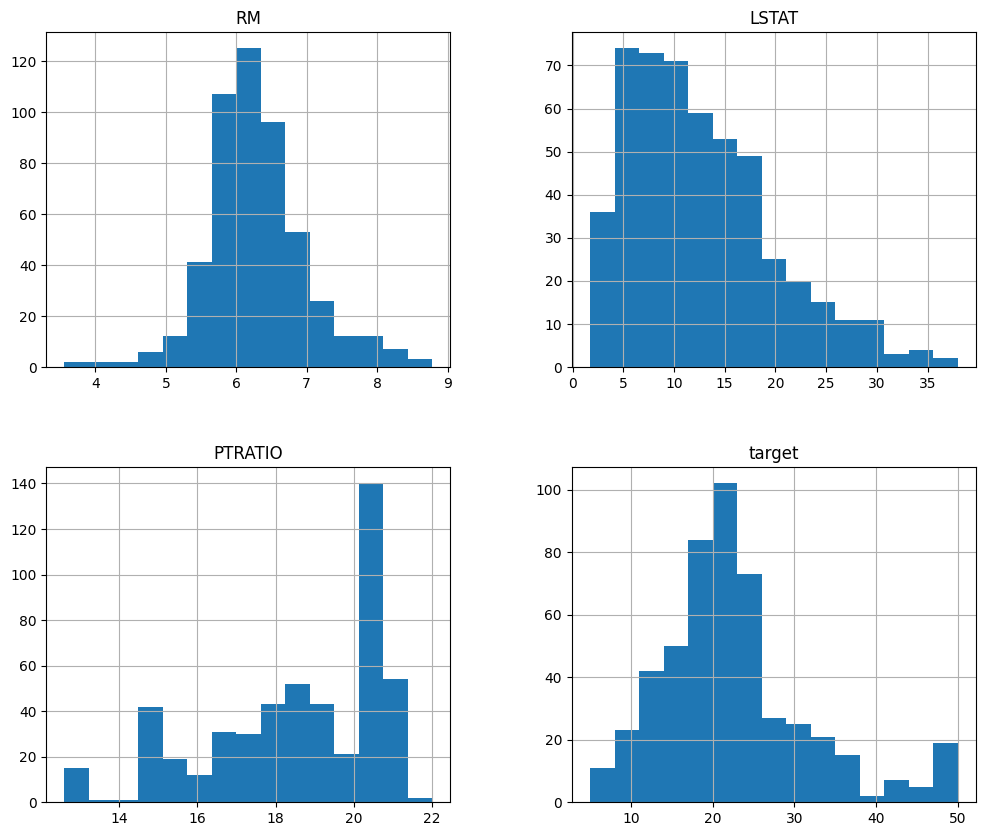

In [64]:
# Visualización de distribuciones numéricas
df.hist(figsize=(12, 10), bins=15)  # Crea histogramas para todas las columnas numéricas.

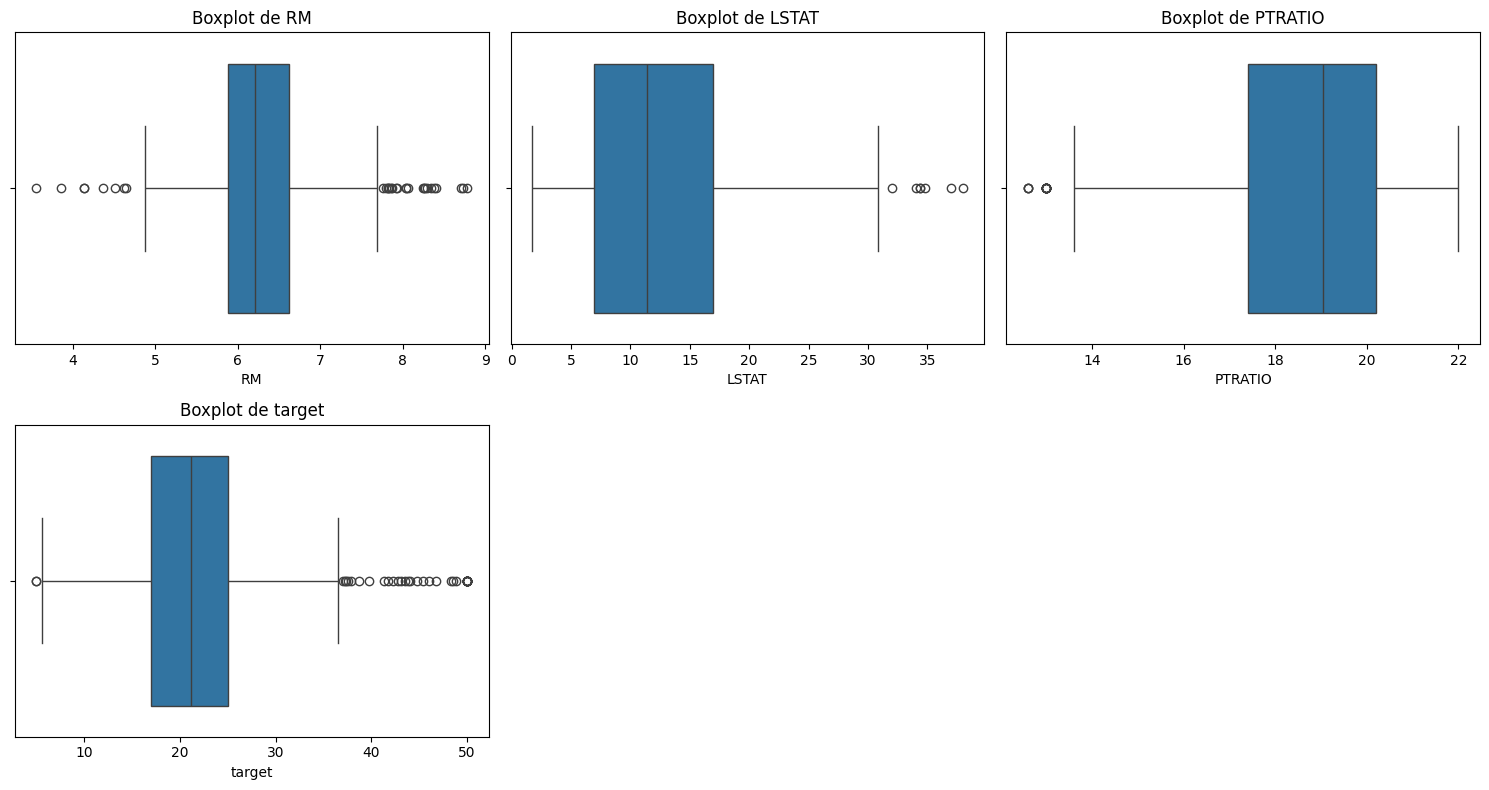

In [65]:
# Boxplots para detectar outliers en columnas numéricas

# Selecciona las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Define el tamaño de la figura y el layout de los subplots
n_cols = 3  # Número de columnas de subplots en cada fila
n_rows = int(np.ceil(len(numeric_columns) / n_cols))  # Calcula el número de filas necesarias

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Ajusta el tamaño de la figura

# Genera un boxplot en cada subplot
for i, column in enumerate(numeric_columns):
    row = i // n_cols  # Fila del subplot
    col = i % n_cols   # Columna del subplot
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Boxplot de {column}")

# Oculta cualquier subplot vacío si hay menos columnas que el número de subplots disponibles
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

In [66]:
# Detectar valores atípicos (outliers) con el rango intercuartil (IQR)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Un valor se considera atípico si está por debajo de (Q1 - 1.5 * IQR) o por encima de (Q3 + 1.5 * IQR).
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]
    print(f"\n{column} - Número de outliers: {outliers.shape[0]}")



RM - Número de outliers: 30

LSTAT - Número de outliers: 7

PTRATIO - Número de outliers: 15

target - Número de outliers: 40


<Axes: >

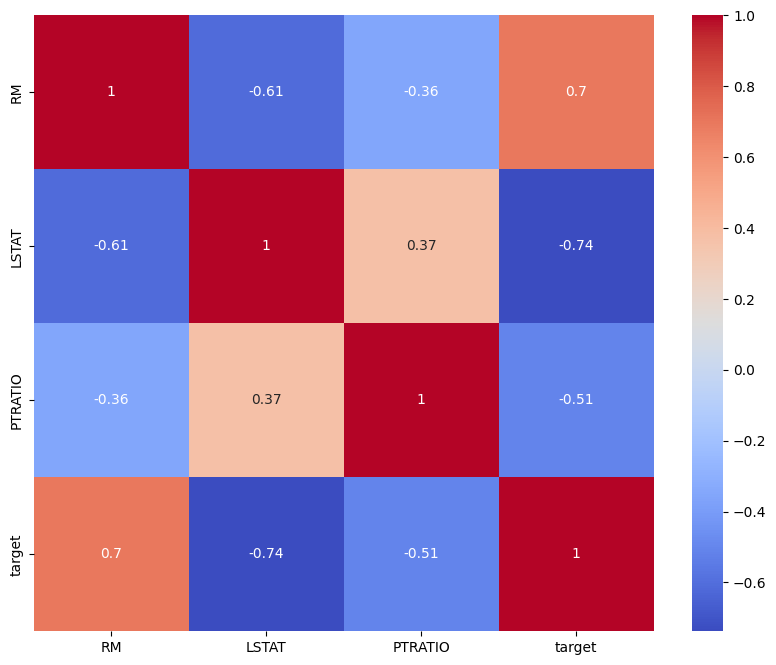

In [68]:
# Seleccionar solo las columnas numéricas para el análisis de correlación
numeric_cols = df.select_dtypes(include=['number'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_cols.corr()

# Gráfico de matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm")  # Visualiza la matriz de correlación en un heatmap.

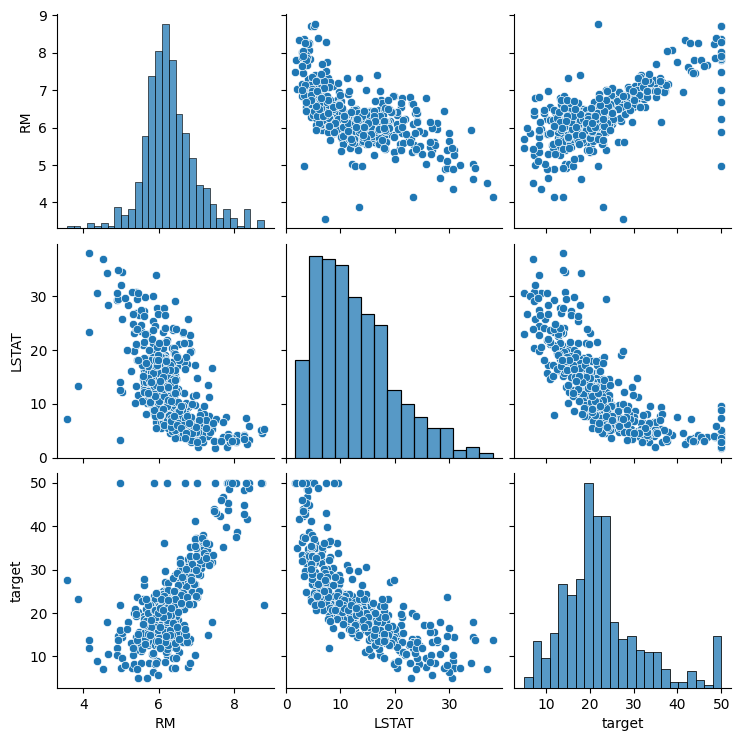

In [73]:
# Distribución por pares de variables (usando un pairplot)

# Paso 1: Filtra las variables que tienen una correlación alta (por ejemplo, superior a 0.6 en valor absoluto) Se debe ajustar segun necesidad
threshold = 0.6
high_corr_pairs = correlation_matrix[(correlation_matrix.abs() > threshold) & (correlation_matrix != 1)]

# Paso 2: Selecciona solo las columnas con alta correlación
correlated_vars = high_corr_pairs.dropna(how='all', axis=1).columns

# Paso 3: Genera el pairplot solo para las variables con correlación significativa
sns.pairplot(df[correlated_vars]) # Muestra gráficos de dispersión y distribuciones univariadas para todas las variables numéricas

In [78]:
#Filtrar las características más importantes para el modelo:

# Definir la variable objetivo (por ejemplo, 'price')
target_variable = 'target'  # Cambia por el nombre de tu variable objetivo

# Calcular la correlación de todas las columnas con la variable objetivo
correlation_matrix = df.corr()[target_variable]

# Filtrar las columnas que tienen una correlación mayor o igual a 0.40 con la variable objetivo
selected_features = correlation_matrix[correlation_matrix.abs() >= 0.50].index

# Crear un nuevo DataFrame solo con las columnas seleccionadas
df_selected = df[selected_features]

print("Columnas seleccionadas:")
print(selected_features)
print("\nDataFrame con columnas seleccionadas:")
print(df_selected.head())

Columnas seleccionadas:
Index(['RM', 'LSTAT', 'PTRATIO', 'target'], dtype='object')

DataFrame con columnas seleccionadas:
      RM  LSTAT  PTRATIO  target
0  6.575   4.98     15.3    24.0
1  6.421   9.14     17.8    21.6
2  7.185   4.03     17.8    34.7
3  6.998   2.94     18.7    33.4
4  7.147   5.33     18.7    36.2


In [80]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

X = df.drop(["target"], axis=1) # Features
y = df["target"] # Target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir las columnas numéricas y categóricas
numeric_features = X.select_dtypes(include=[int, float]).columns.tolist()
categorical_features = X.select_dtypes(include=[object]).columns.tolist()

# Crear transformadores para cada subconjunto de columnas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Crear un ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])


In [81]:
# LINEAR REGRESSION

# Crear un Pipeline completo
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LinearRegression())
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_lr.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_lr = pipeline_lr.predict(X_test)

# Calcular la precisión del modelo
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Resultado del R2 de Linear Regression: {r2_lr}")
print(f"Resultado del MSE de Linear Regression: {mse_lr}")

Resultado del R2 de Linear Regression: 0.6302528487272829
Resultado del MSE de Linear Regression: 27.114957415580566


In [82]:
# Entrenamiento del modelo KNN
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# Crear un Pipeline con el preprocesador y el regressor
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Asegúrate de tener el preprocesador definido
    ('knn', KNeighborsRegressor())  # Aquí inicializamos el modelo KNN sin el parámetro 'n_neighbors'
])

# Probar diferentes valores de K
k_values = list(range(1, 21))
mse_scores = []

for k in k_values:
    # Ajustar el número de vecinos en cada iteración
    pipeline_knn.set_params(knn__n_neighbors=k)
    
    # Validación cruzada con 5 pliegues
    scores = cross_val_score(pipeline_knn, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    
    # Guardar el promedio del MSE (recuerda que cross_val_score devuelve negativos)
    mse_scores.append(np.mean(scores))

# Seleccionar el K con el menor MSE (máximo valor negativo)
best_k = k_values[np.argmax(mse_scores)]
print(f'Mejor valor de K: {best_k}')

# Ahora, usa el mejor K encontrado para entrenar el modelo final
pipeline_knn.set_params(knn__n_neighbors=best_k)
pipeline_knn.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_knn = pipeline_knn.predict(X_test)

# Calcular y mostrar las métricas
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print(f"Resultado del R2 del KNN: {r2_knn}")
print(f"Resultado del MSE del KNN: {mse_knn}")

Mejor valor de K: 6
Resultado del R2 del KNN: 0.7725359318074856
Resultado del MSE del KNN: 16.68080065359477


In [83]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor

# Crear un Pipeline completo
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeRegressor(random_state=0))
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_dt.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_dt = pipeline_dt.predict(X_test)

# Calcular la precisión del modelo
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"Resultado del R2 de Desicion Tree: {r2_dt}")
print(f"Resultado del MSE de Desicion Tree: {mse_dt}")

Resultado del R2 de Desicion Tree: 0.4693000467597006
Resultado del MSE de Desicion Tree: 38.91823529411764


In [84]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

# Crear un Pipeline completo
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Ajustar el Pipeline a los datos de entrenamiento
pipeline_rf.fit(X_train, y_train)

# Hacer predicciones utilizando el Pipeline
y_pred_rf = pipeline_rf.predict(X_test)

# Calcular la precisión del modelo
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Resultado del R2 de Random Forest: {r2_rf}")
print(f"Resultado del MSE de Random Forest: {mse_rf}")

Resultado del R2 de Random Forest: 0.7379962973725076
Resultado del MSE de Random Forest: 19.213722715686263


In [85]:
# ORGANIZACION DE RESULTADOS

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame({
    'Model': ['Linear Regression', 'KNN', 'Decision Tree', 'Random Forest'],
    'R2': [r2_lr, r2_knn, r2_dt, r2_rf],
    'MSE': [mse_lr, mse_knn, mse_dt, mse_rf]
})

# Imprimir los resultados
print(results)

               Model        R2        MSE
0  Linear Regression  0.630253  27.114957
1                KNN  0.772536  16.680801
2      Decision Tree  0.469300  38.918235
3      Random Forest  0.737996  19.213723


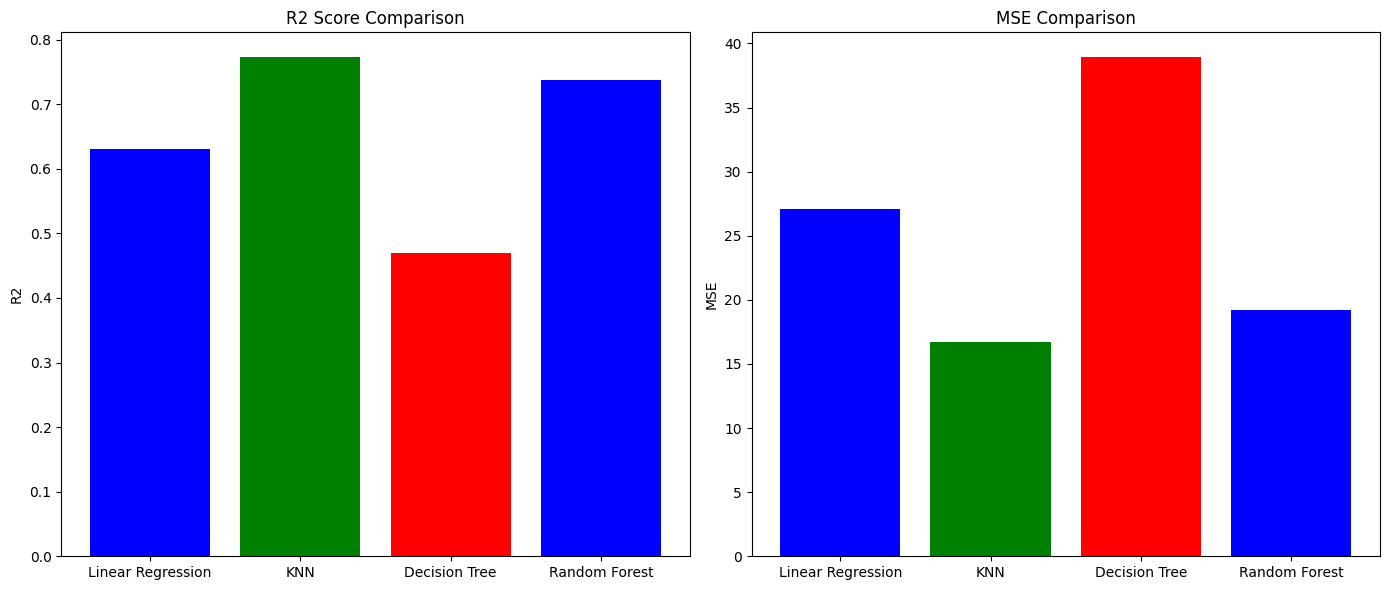

In [86]:
# GRAFICAR LOS RESULTADOS

import matplotlib.pyplot as plt

# Graficar los resultados
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de R2
ax[0].bar(results['Model'], results['R2'], color=['blue', 'green', 'red'])
ax[0].set_title('R2 Score Comparison')
ax[0].set_ylabel('R2')

# Gráfico de MSE
ax[1].bar(results['Model'], results['MSE'], color=['blue', 'green', 'red'])
ax[1].set_title('MSE Comparison')
ax[1].set_ylabel('MSE')

plt.tight_layout()
plt.show()

In [87]:
# COMPARAR TIEMPO DE ENTRENAMIENTO

import time

# Función para medir el tiempo de entrenamiento
def measure_training_time(pipeline, X_train, y_train):
    start_time = time.perf_counter()
    pipeline.fit(X_train, y_train)
    end_time = time.perf_counter()
    return end_time - start_time

# Medir el tiempo de entrenamiento para cada modelo
time_lr = measure_training_time(pipeline_lr, X_train, y_train)
time_knn = measure_training_time(pipeline_knn, X_train, y_train)
time_dt = measure_training_time(pipeline_dt, X_train, y_train)
time_rf = measure_training_time(pipeline_rf, X_train, y_train)

# Agregar el tiempo al DataFrame
results['Training Time (s)'] = [time_lr, time_knn, time_dt, time_rf]

# Imprimir los resultados con tiempo de entrenamiento
print(results)

               Model        R2        MSE  Training Time (s)
0  Linear Regression  0.630253  27.114957           0.005881
1                KNN  0.772536  16.680801           0.005429
2      Decision Tree  0.469300  38.918235           0.006824
3      Random Forest  0.737996  19.213723           0.183485


In [90]:
# LAZY PREDICT

from lazypredict.Supervised import LazyRegressor

# Usar Lazy Regressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 48%|████▊     | 20/42 [00:00<00:00, 29.65it/s]C:\Users\sebac\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████| 42/42 [00:01<00:00, 34.55it/s]

                               Adjusted R-Squared  R-Squared    RMSE  \
Model                                                                  
LGBMRegressor                                0.77       0.77    4.09   
KNeighborsRegressor                          0.76       0.77    4.10   
HistGradientBoostingRegressor                0.76       0.77    4.14   
ExtraTreesRegressor                          0.76       0.76    4.16   
BaggingRegressor                             0.75       0.76    4.20   
GradientBoostingRegressor                    0.73       0.74    4.35   
AdaBoostRegressor                            0.73       0.74    4.35   
RandomForestRegressor                        0.73       0.74    4.38   
PoissonRegressor                             0.73       0.73    4.41   
NuSVR                                        0.72       0.73    4.46   
SVR                                          0.72       0.73    4.47   
XGBRegressor                                 0.70       0.71    